# LabelPropagation example
## 필요한 패키지 부르기

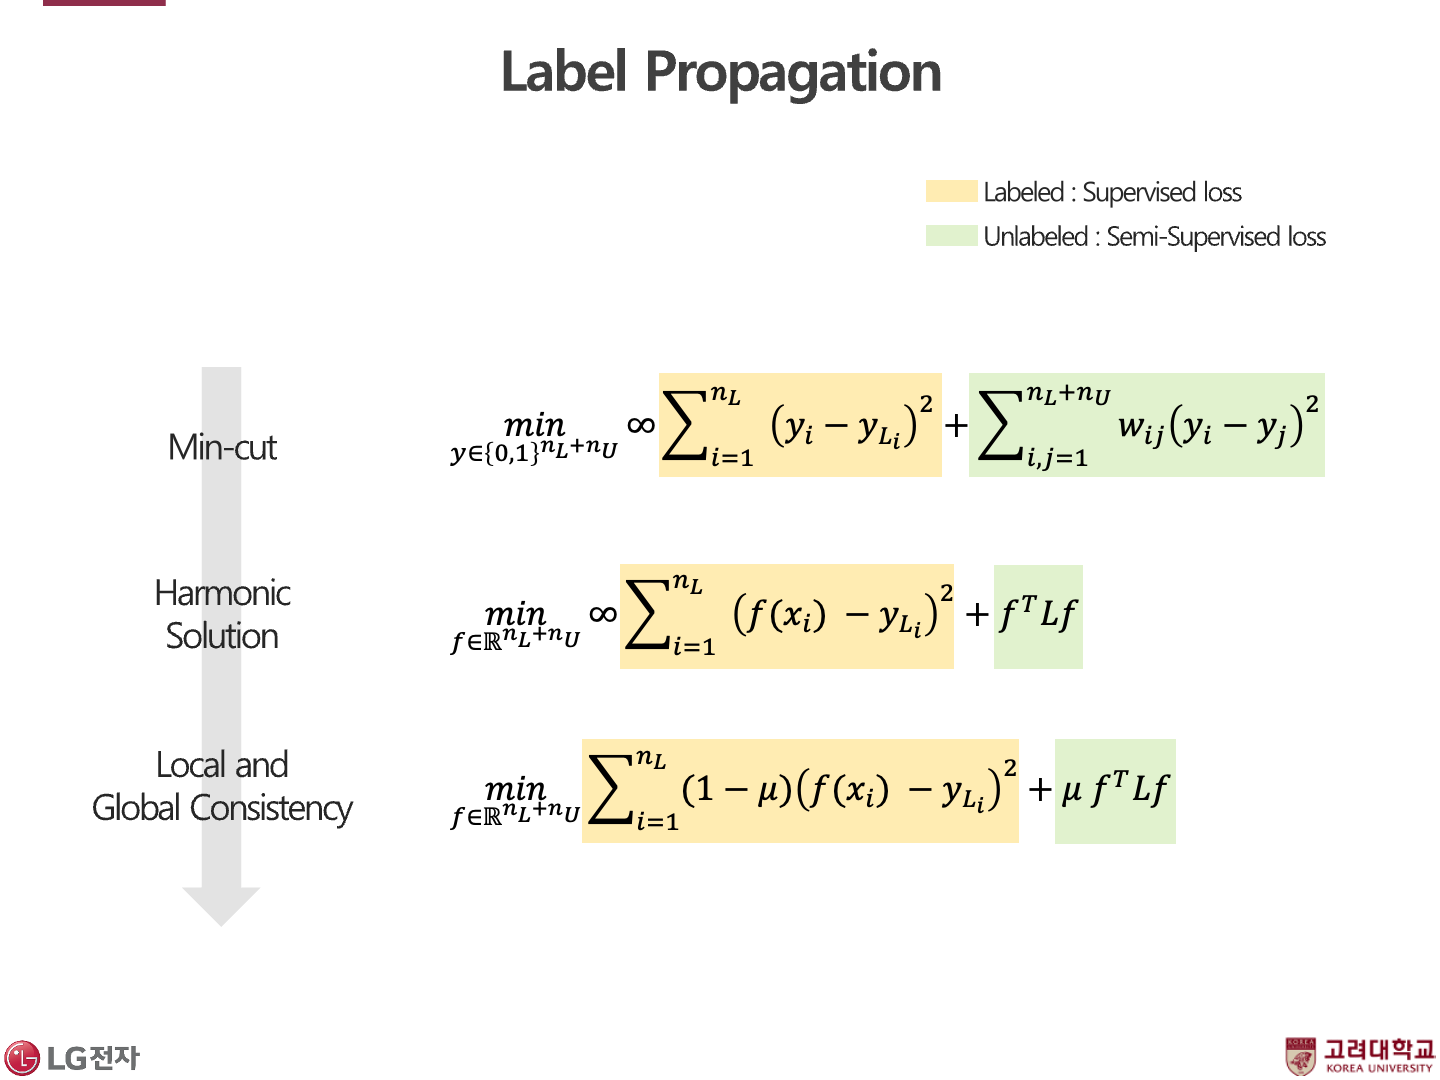

In [1]:
from IPython.display import Image
Image(filename="./image/LabelPropagation.png")

In [1]:
import random
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
from sklearn.semi_supervised import LabelPropagation
from sklearn.metrics import classification_report

In [2]:
# load data
data = datasets.load_iris()

In [3]:
X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = pd.DataFrame(data['target'], columns=['label'])

In [4]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [5]:
y

,label
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [6]:
data = pd.concat([X, y], axis=1)
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [7]:
# Split train dataset & test dataset 
train, test = train_test_split(data, test_size=0.2, random_state=0)

In [8]:
X_train, y_train = train.drop(['label'], axis=1), train.loc[:, 'label']
X_test, y_test = test.drop(['label'], axis=1), test.loc[:, 'label']
del(train, test)

In [9]:
# Check indices of train dataset
indices_train = list(X_train.index)
print(indices_train)

[137, 84, 27, 127, 132, 59, 18, 83, 61, 92, 112, 2, 141, 43, 10, 60, 116, 144, 119, 108, 69, 135, 56, 80, 123, 133, 106, 146, 50, 147, 85, 30, 101, 94, 64, 89, 91, 125, 48, 13, 111, 95, 20, 15, 52, 3, 149, 98, 6, 68, 109, 96, 12, 102, 120, 104, 128, 46, 11, 110, 124, 41, 148, 1, 113, 139, 42, 4, 129, 17, 38, 5, 53, 143, 105, 0, 34, 28, 55, 75, 35, 23, 74, 31, 118, 57, 131, 65, 32, 138, 14, 122, 19, 29, 130, 49, 136, 99, 82, 79, 115, 145, 72, 77, 25, 81, 140, 142, 39, 58, 88, 70, 87, 36, 21, 9, 103, 67, 117, 47]


In [10]:
# Shuffle them
random.shuffle(indices_train)
print(indices_train)

[15, 23, 143, 138, 140, 131, 141, 29, 64, 101, 2, 112, 136, 58, 91, 48, 113, 43, 68, 19, 41, 149, 27, 104, 81, 60, 118, 135, 84, 85, 3, 47, 42, 4, 74, 148, 39, 130, 50, 120, 80, 25, 132, 20, 21, 53, 17, 88, 119, 12, 18, 129, 105, 146, 77, 65, 13, 70, 38, 0, 34, 31, 57, 144, 67, 117, 147, 75, 28, 11, 83, 128, 14, 96, 49, 110, 92, 52, 61, 35, 103, 145, 55, 116, 36, 108, 9, 69, 123, 94, 89, 109, 56, 106, 79, 137, 1, 127, 99, 82, 133, 46, 115, 72, 142, 102, 125, 139, 5, 6, 59, 87, 32, 30, 122, 98, 111, 124, 95, 10]


In [11]:
# Generate unlabel data
y_train_true = y_train.copy()

In [12]:
unlabeled_ratio = 0.2
indices_unlabeled = indices_train[int(len(indices_train)*(1-unlabeled_ratio)):]

In [13]:
print("The number of real train data: %d \n the number of unlabeled data: %d"%(
    len(indices_train), len(indices_unlabeled)
))

The number of real train data: 120 
 the number of unlabeled data: 24


In [14]:
y_train.loc[indices_unlabeled] = -1
y_train

137    2
84     1
27     0
127   -1
132    2
      ..
9      0
103    2
67     1
117    2
47     0
Name: label, Length: 120, dtype: int64

In [15]:
# Min Max scaling
scaler = MinMaxScaler().fit(X_train.values)
X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [16]:
# Four dimension to Two dimension using t-SNE
# Visualize real train dataset and unlabeled data
tSNE = TSNE(random_state=0, n_jobs=-1)
X_embedded = pd.DataFrame(tSNE.fit_transform(X_train), index=X_train.index, columns=[0, 1])

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


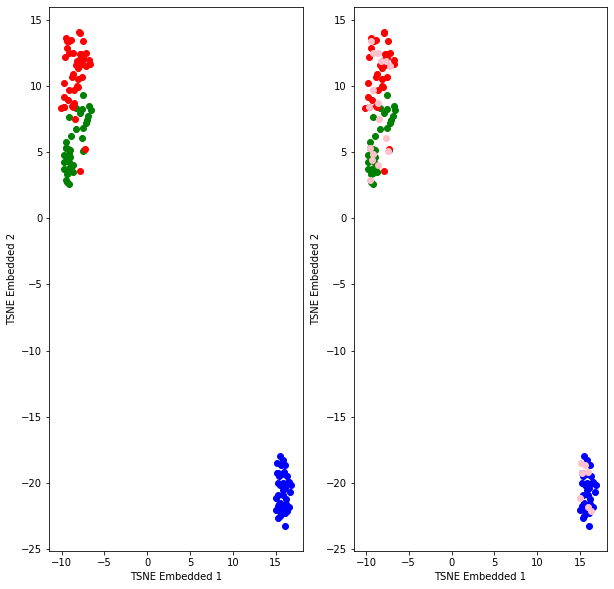

In [17]:
colors = ['b', 'g', 'r', 'pink']
legends = ['0', '1', '2', '-1']
plt.figure(figsize=(10, 10))
plt.subplot(121)
for c in [0, 1, 2]:
    tmp_y = y_train_true[y_train_true==c]
    tmp_x = X_embedded.loc[list(tmp_y.index), :]
    
    plt.scatter(tmp_x[0], tmp_x[1], color=colors[c], label=legends[c])
plt.xlabel('TSNE Embedded 1')
plt.ylabel('TSNE Embedded 2')

plt.subplot(122)
for c in [0, 1, 2, -1]:
    tmp_y = y_train[y_train==c]
    tmp_x = X_embedded.loc[list(tmp_y.index), :]
    
    if c == -1:
        plt.scatter(tmp_x[0], tmp_x[1], color=colors[-1], label=legends[-1])
    else:
        plt.scatter(tmp_x[0], tmp_x[1], color=colors[c], label=legends[c])
plt.xlabel('TSNE Embedded 1')
plt.ylabel('TSNE Embedded 2')

plt.show()

In [18]:
# Build LabelPropagation model
model = LabelPropagation(
    kernel='rbf',
    gamma=20,
    n_neighbors=3,
    max_iter=100,
    tol=1e-3,
    n_jobs=-1
)
model.fit(X_train.values, y_train.values)

LabelPropagation(max_iter=100, n_jobs=-1, n_neighbors=3)

In [19]:
# Evaluate prediction results
y_train_pred = pd.Series(model.predict(X_train), index=y_train.index)
y_test_pred = pd.Series(model.predict(X_test), index=y_test.index)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LabelPropagation was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LabelPropagation was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [20]:
print(classification_report(y_train_true, y_train_pred, target_names=['0', '1', '2']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       0.92      0.95      0.93        37
           2       0.95      0.93      0.94        44

    accuracy                           0.96       120
   macro avg       0.96      0.96      0.96       120
weighted avg       0.96      0.96      0.96       120



In [21]:
print(classification_report(y_test, y_test, target_names=['0', '1', '2']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



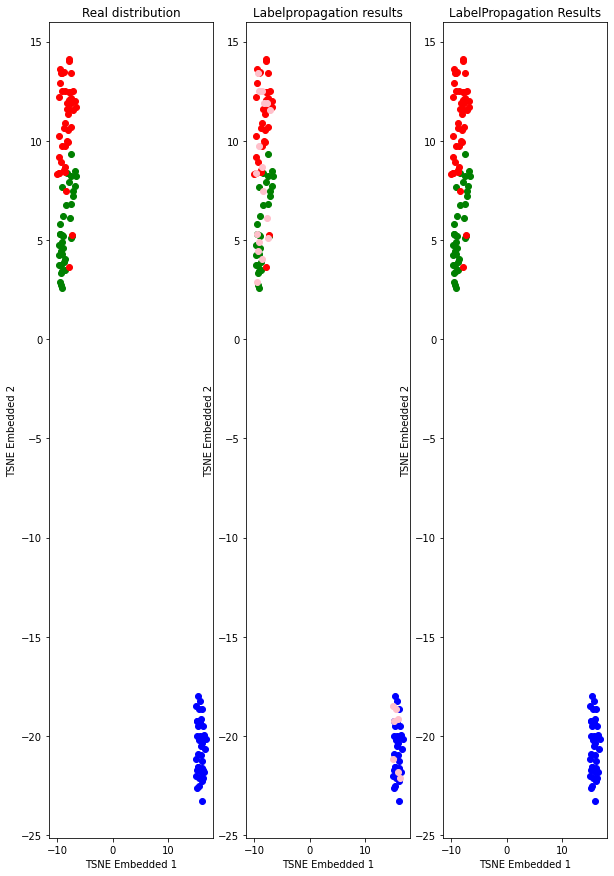

In [22]:
# Visualize results of labelpropagation
plt.figure(figsize=(10, 15))
plt.subplot(131)
for c in [0, 1, 2]:
    tmp_y = y_train_true[y_train_true==c]
    tmp_x = X_embedded.loc[list(tmp_y.index), :]
    
    plt.scatter(tmp_x[0], tmp_x[1], color=colors[c], label=legends[c])
plt.xlabel('TSNE Embedded 1')
plt.ylabel('TSNE Embedded 2')
plt.title('Real distribution')

plt.subplot(132)
for c in [0, 1, 2, -1]:
    tmp_y = y_train[y_train==c]
    tmp_x = X_embedded.loc[list(tmp_y.index), :]
    
    if c == -1:
        plt.scatter(tmp_x[0], tmp_x[1], color=colors[-1], label=legends[-1])
    else:
        plt.scatter(tmp_x[0], tmp_x[1], color=colors[c], label=legends[c])
plt.xlabel('TSNE Embedded 1')
plt.ylabel('TSNE Embedded 2')
plt.title('Labelpropagation results')

plt.subplot(133)
for c in [0, 1, 2]:
    tmp_y = y_train_pred[y_train_true==c]
    tmp_x = X_embedded.loc[list(tmp_y.index), :]
    
    plt.scatter(tmp_x[0], tmp_x[1], color=colors[c], label=legends[c])
plt.xlabel('TSNE Embedded 1')
plt.ylabel('TSNE Embedded 2')
plt.title('LabelPropagation Results')

plt.show()